## Observations and Insights 

 * The treatment Capomulin was a successful in shrinking the tumor for mouse, s185. The tumor volume shrunk more than 50%.
 * The mouse weight and tumor volume have a positive correlation. It seems the larger the mouse is, the more volumous their tumore is.
 * Infubinol and Ceftamin do not seem to be effective treatments. It seems the median tumor volume increased at the latest timepoint for each mouse being treated with those drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mice = complete_df['Mouse ID'].count()
count_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = complete_df[complete_df.duplicated(['Mouse ID', 'Timepoint'])]
dup





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = complete_df.duplicated(subset =["Mouse ID","Timepoint"], keep = False)
duplicate_mice_df = complete_df[duplicate_mice]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df.drop_duplicates(subset =["Mouse ID","Timepoint"], 
                     keep = 'last', inplace = False)
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
g_unique_mice_df = cleaned_df.groupby(['Drug Regimen'])
tumors = g_unique_mice_df['Tumor Volume (mm3)']

u_mice_mean = tumors.mean()
u_mice_median = tumors.median()
u_mice_var = tumors.var()
u_mice_std = tumors.std()
u_mice_sem = tumors.sem()


stats_table = pd.DataFrame({'Mean': u_mice_mean,'Median': u_mice_median,'Variance': u_mice_var, 
                     'Standard Deviation': u_mice_std,'SEM': u_mice_sem})
stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

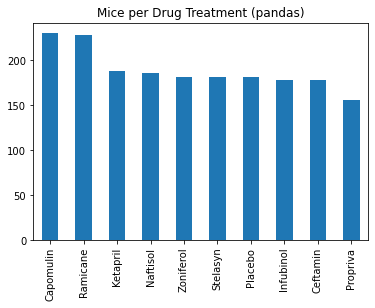

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treat_count = cleaned_df['Drug Regimen'].value_counts()
treat_count.plot(kind="bar")
plt.title("Mice per Drug Treatment (pandas)")
plt.savefig("analysis/PandasBarGraph.png")

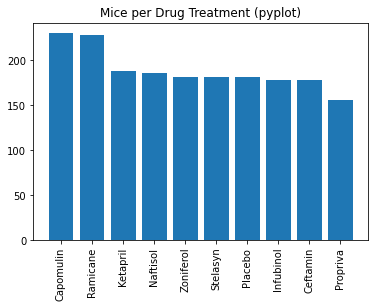

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(treat_count.index.values.tolist(), treat_count.values.tolist())
plt.xticks(rotation=90)
plt.title("Mice per Drug Treatment (pyplot)")
plt.savefig("analysis/PyplotBarGraph.png")

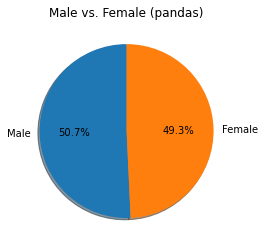

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = cleaned_df['Sex'].value_counts()
gender_count.index.name = None
gender_count.plot(kind="pie",autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Male vs. Female (pandas)")
plt.ylabel('')
plt.savefig("analysis/PandasPieGraph.png")

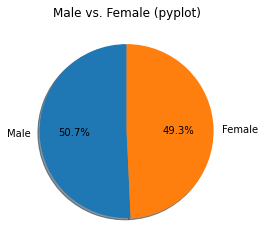

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count.values.tolist(), labels=gender_count.index.values.tolist(),
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Male vs. Female (pyplot)")
plt.savefig("analysis/PyplotPieGraph.png")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cleaned_df.sort_values(by = ['Mouse ID','Timepoint'])
sorted_df = sorted_df.drop_duplicates(subset ="Mouse ID", 
                     keep = 'last', inplace = False)
sorted_df = sorted_df[sorted_df['Timepoint'] != 0]
delete_drugs = ((sorted_df['Drug Regimen'] != 'Placebo') & (sorted_df['Drug Regimen'] != 'Stelasyn') &
(sorted_df['Drug Regimen'] != 'Zoniferol') & (sorted_df['Drug Regimen'] != 'Ketapril')&
(sorted_df['Drug Regimen'] != 'Propriva') &(sorted_df['Drug Regimen'] != 'Naftisol'))

sorted_df['Tumor Volume (mm3)'].astype(float)
df = sorted_df[delete_drugs].groupby(['Drug Regimen'])


df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
214,a520,Ramicane,Male,13,21,45,38.810366,1
530,a577,Infubinol,Female,6,25,30,57.031862,2
174,a644,Ramicane,Female,7,17,45,32.978522,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
 
    # Determine outliers using upper and lower bounds

quartiles = df['Tumor Volume (mm3)'].quantile([.25,.5,.75]).unstack()
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes per drug are:\n{lowerq}")
print(f"The upper quartile of tumor volumes per drug are:\n{upperq}")
print(f"The interquartile range of tumor volumes per drug are:\n{iqr}")
print(f"The the median of tumor volumes per drug are:\n{quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below the following could be outliers.\n{lower_bound} ")
print(f"Values above the following could be outliers.\n{upper_bound}")    
    


The lower quartile of tumor volumes per drug are:
Drug Regimen
Capomulin    32.377357
Ceftamin     56.057749
Infubinol    54.048608
Ramicane     31.560470
Name: 0.25, dtype: float64
The upper quartile of tumor volumes per drug are:
Drug Regimen
Capomulin    40.159220
Ceftamin     64.634949
Infubinol    65.525743
Ramicane     40.659006
Name: 0.75, dtype: float64
The interquartile range of tumor volumes per drug are:
Drug Regimen
Capomulin     7.781863
Ceftamin      8.577200
Infubinol    11.477135
Ramicane      9.098537
dtype: float64
The the median of tumor volumes per drug are:
Drug Regimen
Capomulin    38.125164
Ceftamin     61.433892
Infubinol    60.165180
Ramicane     36.561652
Name: 0.5, dtype: float64 
Values below the following could be outliers.
Drug Regimen
Capomulin    20.704562
Ceftamin     43.191949
Infubinol    36.832905
Ramicane     17.912664
dtype: float64 
Values above the following could be outliers.
Drug Regimen
Capomulin    51.832015
Ceftamin     77.500749
Infubinol  

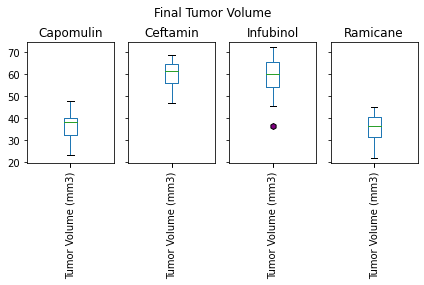

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
out = dict(markerfacecolor='purple', marker='h')
bplot = df.boxplot(column ='Tumor Volume (mm3)', layout=(1,4), sharex=True, sharey=True, rot=90, grid=False, flierprops=out)
plt.suptitle("Final Tumor Volume")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("analysis/Boxplot.png")
plt.show()


## Line and Scatter Plots

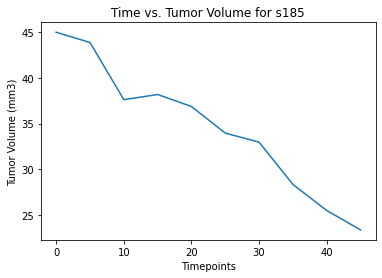

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Capomulin',['Mouse ID','Weight (g)','Timepoint', 'Tumor Volume (mm3)']].reset_index()
mouse_df = capomulin_df[capomulin_df['Mouse ID']=='s185']
x_axis = mouse_df['Timepoint']
y_axis = mouse_df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title('Time vs. Tumor Volume for s185')
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("analysis/Line.png")
plt.show()


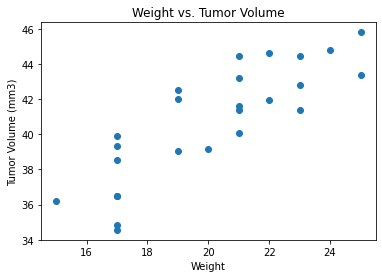

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = capomulin_df.groupby(['Mouse ID']).mean()['Weight (g)']
y_axis = capomulin_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
plt.scatter(x_axis,y_axis)
plt.title('Weight vs. Tumor Volume')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("analysis/Scatter.png")
plt.show()


## Correlation and Regression

The correlation coefficient between weight and average tumor volume is 0.84


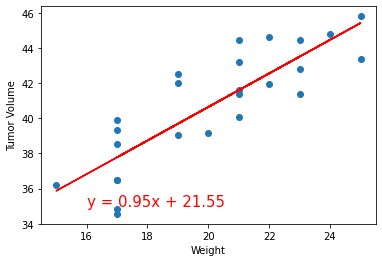

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,m_fit,"r-")
line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))
plt.annotate(line_eq,(16,35),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.savefig("analysis/ScatterWithRegression.png")
plt.show()
